In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [4]:
df_train.drop('Name', axis = 1, inplace = True)
df_test.drop('Name', axis = 1, inplace = True)

In [5]:
df_train.drop('City', axis = 1, inplace = True)
df_test.drop('City', axis = 1, inplace = True)

In [6]:
def clean_and_fill_column(column):
    valid_values = set(df_train[column].dropna())
    df_test[column] = df_test[column].where(df_test[column].isin(valid_values), np.nan)
    
    most_common = df_train[column].mode()[0]
    df_train[column].fillna(most_common, inplace=True)
    df_test[column].fillna(most_common, inplace=True)

for col in ['Dietary Habits', 'Degree', 'Sleep Duration']:
    clean_and_fill_column(col)

In [7]:
lst = ['Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Financial Stress']
for col in lst:
    df_train[col].fillna(df_train[col].median(), inplace=True)
    df_test[col].fillna(df_test[col].median(), inplace=True)

In [8]:
col = 'Profession'
df_train[col] = df_train[col].astype(str)
df_test[col] = df_test[col].astype(str)

valid_values = set(df_train[col].unique())
df_test[col] = df_test[col].where(df_test[col].isin(valid_values), np.nan)

most_common = df_train[col].mode()[0]
df_test[col].fillna(most_common, inplace=True)


In [9]:
df_train.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [10]:
print(df_train['Depression'].value_counts())

Depression
0    115133
1     25567
Name: count, dtype: int64


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
for i in df_test.columns:
    if df_train[i].dtype == object:
        if len(set(df_test[i]).difference(set(df_train[i]))) > 0:
            print(i)

In [13]:
set(df_test['Profession']).difference(set(df_train['Profession']))

set()

In [14]:
encoders = {}
for col in df_train.columns:
    if df_train[col].dtype == object:
        label = LabelEncoder()
        df_train[col] = label.fit_transform(df_train[col].astype(str))
        df_test[col] = label.transform(df_test[col].astype(str))
        encoders[col] = label

<Axes: xlabel='Gender'>

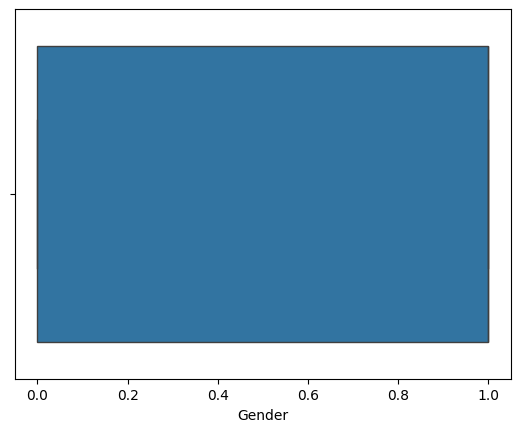

In [15]:
sns.boxplot(x=df_train['Gender'])

# SVC + StandardScaler

In [16]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

In [17]:
model = SVC()
scaler = StandardScaler()

In [18]:
params = {
    'model__C' : [1, 5,10],
    'model__kernel' : ['linear', 'poly', 'rbf', 'sigmoid' ],
    'model__gamma' : ['scale', 'auto']
}

In [19]:
print(df_train['Gender'].value_counts())

Gender
1    77464
0    63236
Name: count, dtype: int64


In [20]:
pipe = Pipeline([('scaler', scaler), ('model', model)])

In [21]:
final_model = GridSearchCV(pipe, param_grid=params, verbose=2, cv=3, scoring='accuracy')

In [22]:
X_train = df_train.drop(["Depression"], axis=1)
X_test = df_test.copy()
y_train = df_train['Depression']

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [24]:
print(df_train['Depression'].value_counts())

Depression
0    115133
1     25567
Name: count, dtype: int64


In [25]:
final_model.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END model__C=1, model__gamma=scale, model__kernel=linear; total time= 3.1min
[CV] END model__C=1, model__gamma=scale, model__kernel=linear; total time= 3.2min
[CV] END model__C=1, model__gamma=scale, model__kernel=linear; total time= 2.9min
[CV] END .model__C=1, model__gamma=scale, model__kernel=poly; total time= 2.5min
[CV] END .model__C=1, model__gamma=scale, model__kernel=poly; total time= 2.4min
[CV] END .model__C=1, model__gamma=scale, model__kernel=poly; total time= 2.5min
[CV] END ..model__C=1, model__gamma=scale, model__kernel=rbf; total time= 2.9min
[CV] END ..model__C=1, model__gamma=scale, model__kernel=rbf; total time= 3.0min
[CV] END ..model__C=1, model__gamma=scale, model__kernel=rbf; total time= 2.9min
[CV] END model__C=1, model__gamma=scale, model__kernel=sigmoid; total time= 3.0min
[CV] END model__C=1, model__gamma=scale, model__kernel=sigmoid; total time=10.0min
[CV] END model__C=1, model__gamma=scale, 

,estimator,"Pipeline(step...del', SVC())])"
,param_grid,"{'model__C': [1, 5, ...], 'model__gamma': ['scale', 'auto'], 'model__kernel': ['linear', 'poly', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [26]:
final_model.best_params_

{'model__C': 1, 'model__gamma': 'scale', 'model__kernel': 'linear'}

In [27]:
y_pred = final_model.predict(X_val)

In [28]:
print(classification_report(y_pred,y_val))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     23168
           1       0.81      0.84      0.82      4972

    accuracy                           0.94     28140
   macro avg       0.89      0.90      0.89     28140
weighted avg       0.94      0.94      0.94     28140



In [29]:
final_y = final_model.predict(X_test)

In [30]:
df_sub = pd.read_csv('sample_submission.csv')

In [31]:
df_sub['Depression'] = final_y

In [32]:
df_sub.to_csv('sub.csv', index=False, index_label=False)